In [53]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

### Loding Data sets

In [39]:
df=pd.read_csv('sample_data/AAPL.csv')

In [40]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-07-19,193.100006,198.229996,192.649994,195.100006,194.069336,80507300
1,2023-07-20,195.089996,196.470001,192.500000,193.130005,192.109772,59581200
2,2023-07-21,194.100006,194.970001,191.229996,191.940002,190.926041,71917800
3,2023-07-24,193.410004,194.910004,192.250000,192.750000,191.731750,45377800
4,2023-07-25,193.330002,194.440002,192.919998,193.619995,192.597153,37283200


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [42]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

Text(0, 0.5, 'Close Price')

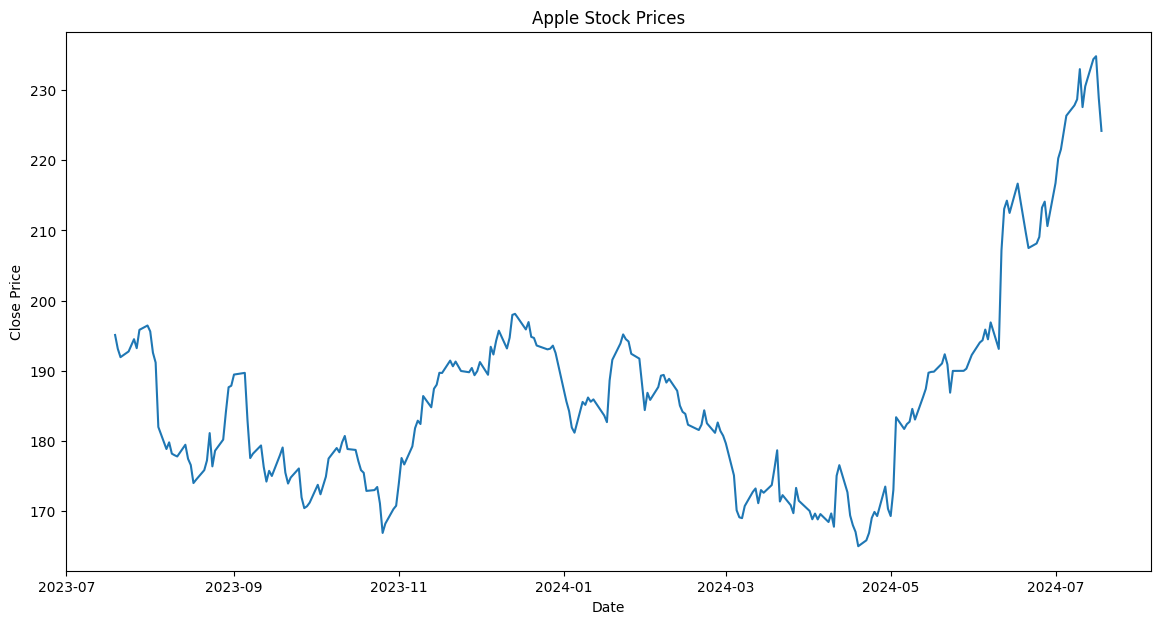

In [59]:
plt.figure(figsize=(14,7))
plt.plot(df['Close'])
plt.title('Apple Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')

### Scaling

In [45]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

In [46]:

def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i: i + seq_length])
    return np.array(sequences)

In [47]:
data_sequences = create_sequences(scaled_data, 60)


In [48]:

X = data_sequences[:, :-1]
y = data_sequences[:, -1]


### spliting data for train and test

In [49]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


### Creating Model Architecture

In [54]:
model =keras.models.Sequential()
model.add(keras.layers.LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(keras.layers.LSTM(50, return_sequences=False))
model.add(keras.layers.Dense(25))
model.add(keras.layers.Dense(1))

In [55]:

model.compile(optimizer='adam', loss='mean_squared_error')

In [56]:
model.fit(X_train, y_train, batch_size=1, epochs=1)

153/153 [==============================] - 10s 32ms/step - loss: 0.0102


In [57]:

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

2/2 [==============================] - 1s 14ms/step


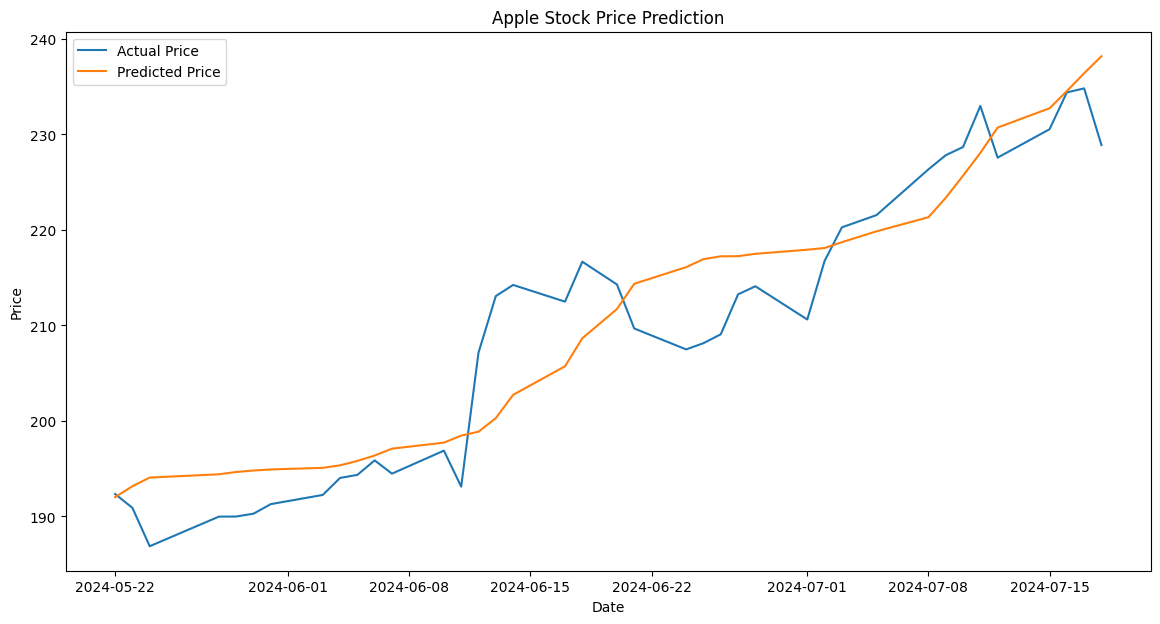

In [58]:
plt.figure(figsize=(14, 7))
plt.plot(df.index[-len(y_test):], scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual Price')
plt.plot(df.index[-len(y_test):], predictions, label='Predicted Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
